In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input DNA dataset

In [2]:
dna_df = pd.read_csv("codon_usage.csv")
#dna_df = pd.read_excel("codon_usage.xlsx")
dna_df

C:\Users\highm\AppData\Local\Temp\ipykernel_29124\4272330581.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dna_df = pd.read_csv("codon_usage.csv")


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


# Missing value check

In [3]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(dna_df)

no missing values left


# Data cleaning

In [4]:
dna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [5]:
index_list = []
for index, DNAtype in enumerate(dna_df['DNAtype']):
    if DNAtype != 0 and DNAtype != 1 and DNAtype != 2:
        index_list.append(index)
print("Index of DNAtype which != 0 nor 1 nor 2:")
print(index_list)

Index of DNAtype which != 0 nor 1 nor 2:
[4318, 5209, 6376, 6719, 6720, 6748, 6757, 6773, 6775, 7150, 7199, 7208, 7316, 7381, 7448, 7452, 7513, 7563, 7614, 7748, 7815, 7831, 7887, 8035, 8223, 8272, 8361, 8388, 8543, 8544, 8569, 8570, 8571, 8572, 8573, 8706, 8875, 8876, 8988, 9360, 9362, 9365, 9372, 9396, 9402, 9846]


In [6]:
for i in range(len(dna_df)):
    x = dna_df.iloc[:, 5][i]
    if isinstance(x, str):
        r = x.replace('.', '', 1).isdigit()
        if r == False:
            print("\nThe index of the entry that does not contain int value:")
            print(i)
            print("The non-int value:")
            print(dna_df.iloc[:, 5][i])


The index of the entry that does not contain int value:
486
The non-int value:
non-B hepatitis virus

The index of the entry that does not contain int value:
5063
The non-int value:
12;I


In [7]:
for i in range(len(dna_df)):
    x = dna_df.iloc[:, 6][i]
    if isinstance(x, str):
        r = x.replace('.', '', 1).isdigit()
        if r == False:
            print("\nThe index of the entry that does not contain int value:")
            print(i)
            print("The non-int value:")
            print(dna_df.iloc[:, 6][i])


The index of the entry that does not contain int value:
5063
The non-int value:
-


In [8]:
dna_df = dna_df.drop(486)
df = dna_df.drop(5063)
df['UUU'] = pd.to_numeric(df['UUU'])
df['UUC'] = pd.to_numeric(df['UUC'])
df.shape

(13026, 69)

In [9]:
df_dna_count = pd.DataFrame(df['DNAtype'])
dna_count = df_dna_count.value_counts()
dna_count1 = pd.DataFrame({'Type Count': dna_count})
dna_count1

,Type Count
DNAtype,
0,9265
1,2899
2,816
4,31
12,5
3,2
5,2
9,2
11,2


In [10]:
df1 = df.drop(4318).drop(5209).drop(6376).drop(6719).drop(6720).drop(6748).drop(6757).drop(6773).drop(6775).drop(7150).drop(7199).drop(7208).drop(7316).drop(7381).drop(7448).drop(7452).drop(7513).drop(7563).drop(7614).drop(7748).drop(7815).drop(7831).drop(7887).drop(8035).drop(8223).drop(8272).drop(8361).drop(8388).drop(8543).drop(8544).drop(8569).drop(8570).drop(8571).drop(8572).drop(8573).drop(8706).drop(8875).drop(8876).drop(8988).drop(9360).drop(9362).drop(9365).drop(9372).drop(9396).drop(9402).drop(9846)
df1.reset_index(inplace=True, drop=True)
df1.shape

(12980, 69)

In [11]:
df_dna_count = pd.DataFrame(df1['DNAtype'])
dna_count = df_dna_count.value_counts()
dna_count1 = pd.DataFrame({'Type Count': dna_count})
dna_count1

,Type Count
DNAtype,
0,9265
1,2899
2,816


In [12]:
plm_list = []
for index, kingdom in enumerate(df1['Kingdom']):
    if kingdom == 'plm':
        plm_list.append(index) 
print('The index of the Kingdom which = plm:')
print(plm_list)

The index of the Kingdom which = plm:
[3687, 3719, 3799, 3952, 4048, 4397, 4406, 4407, 4415, 4439, 4632, 4959, 5119, 5218, 5224, 5225, 5232, 6064]


In [13]:
df_kingdom_count = pd.DataFrame(df1['Kingdom'])
kingdom_count = df_kingdom_count.value_counts()
kingdom_count1 = pd.DataFrame({'Type Count': kingdom_count})
kingdom_count1

,Type Count
Kingdom,
bct,2917
vrl,2831
pln,2490
vrt,2077
inv,1334
mam,572
phg,220
rod,215
pri,180


In [14]:
for index in plm_list:
    df1 = df1.drop(index)
df1.reset_index(inplace=True, drop=True)
df1.shape

(12962, 69)

In [15]:
df_kingdom_count = pd.DataFrame(df1['Kingdom'])
kingdom_count = df_kingdom_count.value_counts()
kingdom_count1 = pd.DataFrame({'Type Count': kingdom_count})
kingdom_count1

,Type Count
Kingdom,
bct,2917
vrl,2831
pln,2490
vrt,2077
inv,1334
mam,572
phg,220
rod,215
pri,180


In [16]:
df_dna_count = pd.DataFrame(df1['DNAtype'])
dna_count = df_dna_count.value_counts()
dna_count1 = pd.DataFrame({'Type Count': dna_count})
dna_count1

,Type Count
DNAtype,
0,9247
1,2899
2,816


Text(0.5, 1.0, 'Relative frequency of each Kingdom')

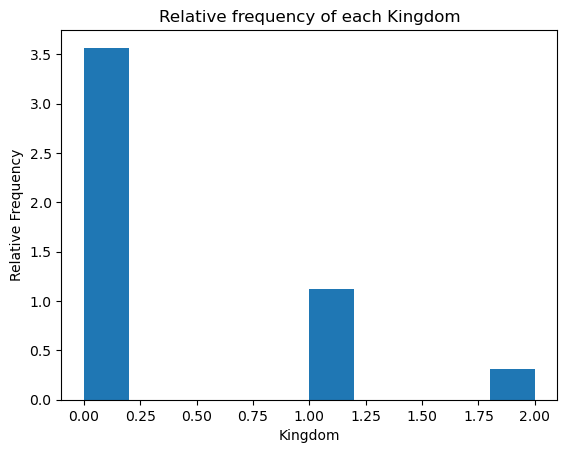

In [17]:
plt.hist(df1['DNAtype'], density=True)
plt.xlabel('Kingdom')
plt.ylabel('Relative Frequency')
plt.title('Relative frequency of each Kingdom')

In [18]:
pd.options.mode.chained_assignment = None
for index, kingdom in enumerate(df1['Kingdom']):
    if kingdom == 'pln' or kingdom == 'inv' or kingdom == 'vrt' or kingdom == 'mam' or kingdom == 'rod' or kingdom == 'pri':
        df1.loc[index, 'Kingdom'] = 'euk'

In [19]:
df_kingdom_count = pd.DataFrame(df1['Kingdom'])
kingdom_count = df_kingdom_count.value_counts()
kingdom_count1 = pd.DataFrame({'Type Count': kingdom_count})
kingdom_count1

,Type Count
Kingdom,
euk,6868
bct,2917
vrl,2831
phg,220
arc,126


Text(0.5, 1.0, 'Relative frequency of each Kingdom')

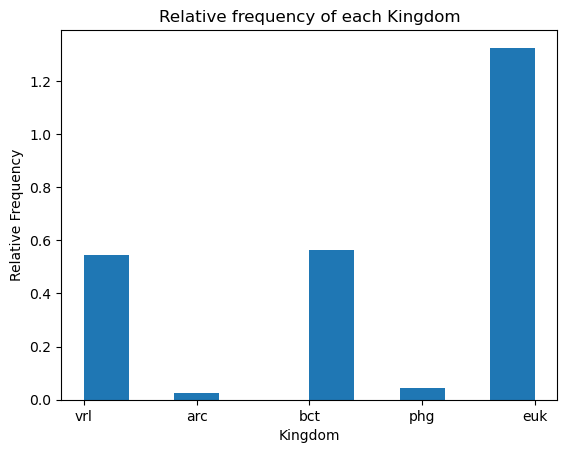

In [20]:
plt.hist(df1['Kingdom'], density=True)
plt.xlabel('Kingdom')
plt.ylabel('Relative Frequency')
plt.title('Relative frequency of each Kingdom')

In [21]:
from sklearn import preprocessing
df1['Kingdom'] = preprocessing.LabelEncoder().fit_transform(df1['Kingdom'])
corr_dna_df = pd.DataFrame({'Kingdom': df1['Kingdom']})

In [22]:
df1 = df1.drop(columns=['SpeciesName','Ncodons','SpeciesID'])
df1

,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [23]:
df1.to_csv('cleaned_codon_usage.csv')

## TSNE:

In [24]:
from sklearn.preprocessing import MinMaxScaler
y_dnatype = df1['DNAtype']
y_kingdom = df1['Kingdom']
x = df1.drop(columns=['DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=1, perplexity=10)
z_tsne = tsne.fit_transform(x_scaled)

C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 12962 samples in 0.003s...
[t-SNE] Computed neighbors for 12962 samples in 0.308s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12962
[t-SNE] Computed conditional probabilities for sample 2000 / 12962
[t-SNE] Computed conditional probabilities for sample 3000 / 12962
[t-SNE] Computed conditional probabilities for sample 4000 / 12962
[t-SNE] Computed conditional probabilities for sample 5000 / 12962
[t-SNE] Computed conditional probabilities for sample 6000 / 12962
[t-SNE] Computed conditional probabilities for sample 7000 / 12962
[t-SNE] Computed conditional probabilities for sample 8000 / 12962
[t-SNE] Computed conditional probabilities for sample 9000 / 12962
[t-SNE] Computed conditional probabilities for sample 10000 / 12962
[t-SNE] Computed conditional probabilities for sample 11000 / 12962
[t-SNE] Computed conditional probabilities for sample 12000 / 12962
[t-SNE] Computed conditional probabilities for sam

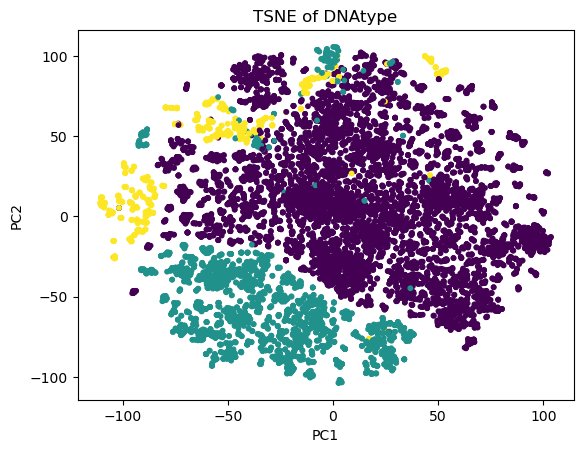

In [26]:
plt.scatter(z_tsne[:,0], z_tsne[:,1], c=y_dnatype, s=10)
plt.title('TSNE of DNAtype')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

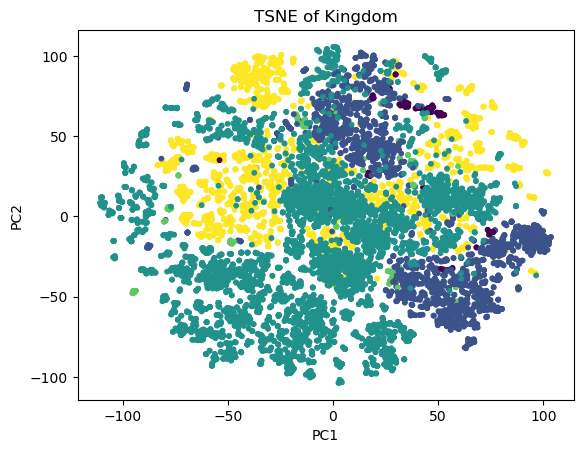

In [27]:
plt.scatter(z_tsne[:,0], z_tsne[:,1], c=y_kingdom, s=10)
plt.title('TSNE of Kingdom')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
tsne = TSNE(n_components=2, verbose=1, random_state=7, perplexity=100)
z_tsne = tsne.fit_transform(x_scaled)

C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 12962 samples in 0.003s...
[t-SNE] Computed neighbors for 12962 samples in 0.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12962
[t-SNE] Computed conditional probabilities for sample 2000 / 12962
[t-SNE] Computed conditional probabilities for sample 3000 / 12962
[t-SNE] Computed conditional probabilities for sample 4000 / 12962
[t-SNE] Computed conditional probabilities for sample 5000 / 12962
[t-SNE] Computed conditional probabilities for sample 6000 / 12962
[t-SNE] Computed conditional probabilities for sample 7000 / 12962
[t-SNE] Computed conditional probabilities for sample 8000 / 12962
[t-SNE] Computed conditional probabilities for sample 9000 / 12962
[t-SNE] Computed conditional probabilities for sample 10000 / 12962
[t-SNE] Computed conditional probabilities for sample 11000 / 12962
[t-SNE] Computed conditional probabilities for sample 12000 / 12962
[t-SNE] Computed conditional probabilities for sa

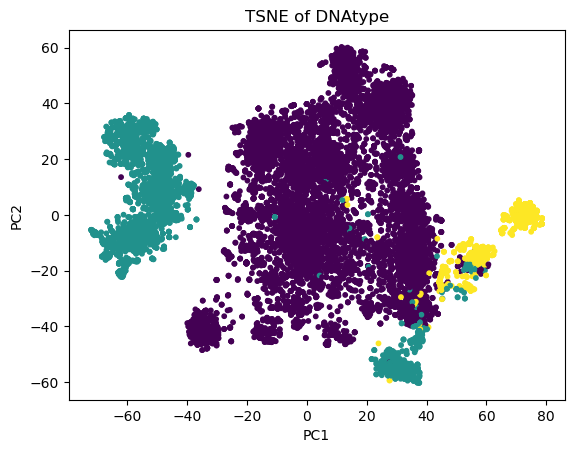

In [29]:
plt.scatter(z_tsne[:,0], z_tsne[:,1], c=y_dnatype, s=10)
plt.title('TSNE of DNAtype')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

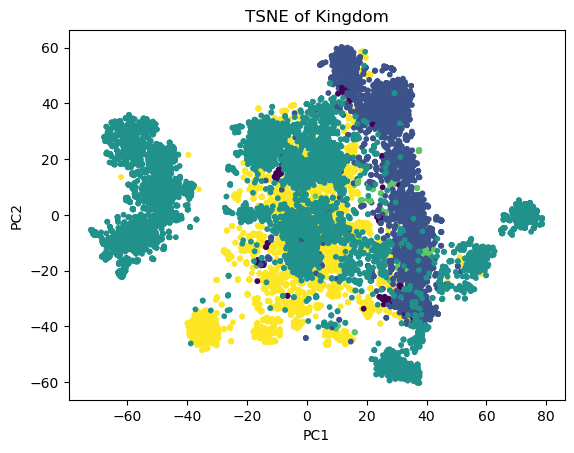

In [30]:
plt.scatter(z_tsne[:,0], z_tsne[:,1], c=y_kingdom, s=10)
plt.title('TSNE of Kingdom')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()